<a href="https://colab.research.google.com/github/kaushikrahul1993/Banking-Domain/blob/main/Custmer_Attrition_%26_Custmer_Loyalty_Card_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/Banking Domain'
os.chdir(path)
sys.path.append(path)

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
bank = pd.read_csv("Bank customers.csv")
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
bank.shape

(10127, 21)

In [ ]:
bank.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# So we will be needing to extract data from Income_Category columns and other
# categorical columns, since as you can see the data is in string format and the
# range is giving, not an exact value which can be feeded into the model directly


In [ ]:
def cat_col_list(df):
    return df.describe(include='O').columns

In [ ]:
cat_col=cat_col_list(bank)

In [ ]:
print(pd.DataFrame(bank.nunique()))

                              0
CLIENTNUM                 10127
Attrition_Flag                2
Customer_Age                 45
Gender                        2
Dependent_count               6
Education_Level               7
Marital_Status                4
Income_Category               6
Card_Category                 4
Months_on_book               44
Total_Relationship_Count      6
Months_Inactive_12_mon        7
Contacts_Count_12_mon         7
Credit_Limit               6205
Total_Revolving_Bal        1974
Avg_Open_To_Buy            6813
Total_Amt_Chng_Q4_Q1       1158
Total_Trans_Amt            5033
Total_Trans_Ct              126
Total_Ct_Chng_Q4_Q1         830
Avg_Utilization_Ratio       964


In [ ]:
cat_col=list(cat_col)+["Months_Inactive_12_mon","Contacts_Count_12_mon","Dependent_count","Total_Relationship_Count"]

In [ ]:
cat_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Dependent_count',
 'Total_Relationship_Count']

In [ ]:
def num_col_list(df):
    return df.describe().columns

In [ ]:
num_col=num_col_list(bank)

In [ ]:
values_to_remove = ["Months_Inactive_12_mon","Contacts_Count_12_mon","Dependent_count","Total_Relationship_Count"]
num_col = [x for x in num_col if x not in values_to_remove]
num_col

['CLIENTNUM',
 'Customer_Age',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [ ]:
def box_plot_num(col,num_col_list, df):
    col_cnt=len(num_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(y=df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.subplots(1,div)
            col_plot=num_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.boxplot(y=df[col_plot[i]],palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.subplots(1,(col_cnt-j))
        col_plot=num_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.boxplot(y=df[col_plot[i]],palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()


rows=4, Col:3, Total:11


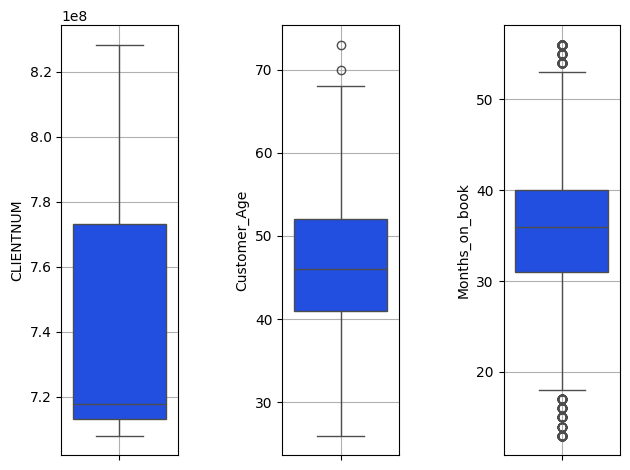

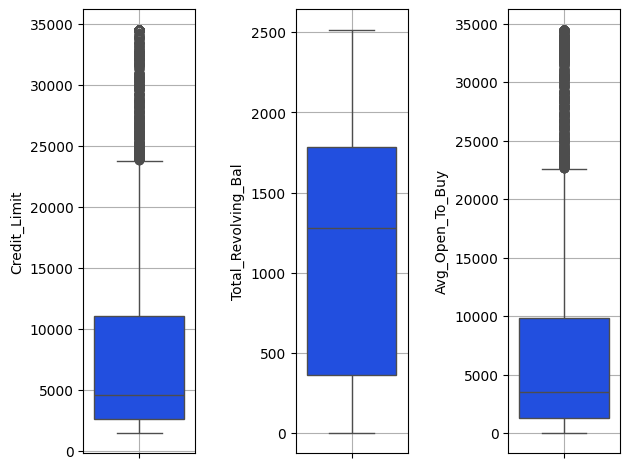

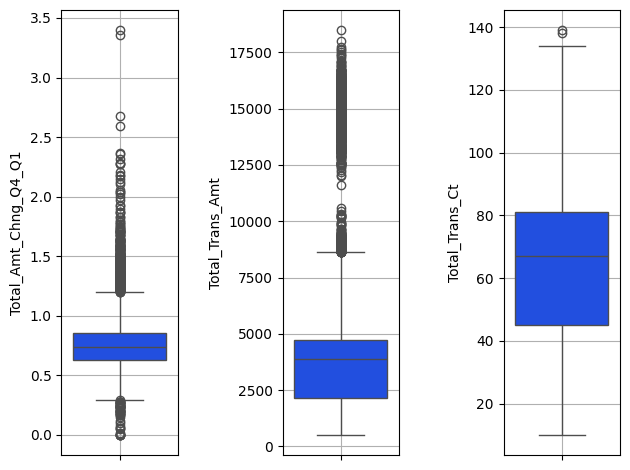

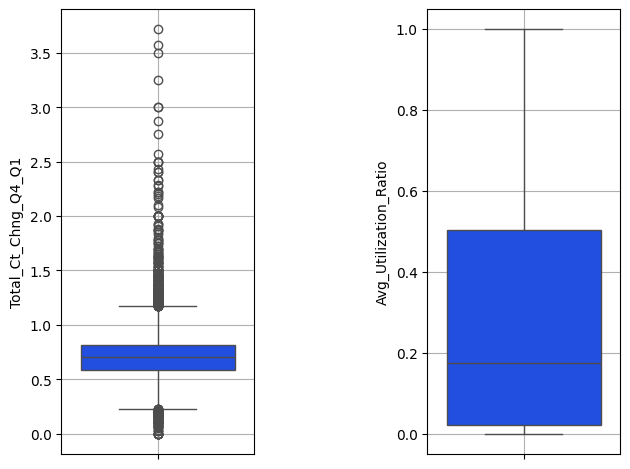

In [ ]:
box_plot_num(col=3,num_col_list=num_col, df=bank)

In [ ]:
def cnt_plot_cat(col,cat_col_list,df):
    col_cnt=len(cat_col_list)
    div=col
    if col_cnt%div==0:
        rows = int(col_cnt/div)
        print(f"rows={rows}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.show()
    else:
        rows = int(col_cnt/div)
        print(f"rows={rows+1}, Col:{div}, Total:{col_cnt}")
        j=0
        row=1
        while row<=rows:
            plt.figure(figsize=(100,10))
            plt.subplots(1,div)
            col_plot=cat_col_list[j:j+div]
            for i in range(0,div):
                plt.subplot(1,div,i+1)
                sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
                plt.grid(visible= True, which='both', axis = "both",)
                plt.title(col_plot[i])
            plt.tight_layout()
            plt.subplots_adjust(wspace=0.9)
            j=j+div
            row=row+1
        plt.figure(figsize=(100,10))
        plt.subplots(1,(col_cnt-j))
        col_plot=cat_col_list[j:col_cnt]
        for i in range(0,(col_cnt-j)):
            plt.subplot(1,(col_cnt-j),i+1)
            sns.barplot(y=df[col_plot[i]].value_counts().values,x=df[col_plot[i]].value_counts().index,palette='bright')
            plt.grid(visible= True, which='both', axis = "both",)
            plt.title(col_plot[i])
            plt.tight_layout()
        plt.subplots_adjust(wspace=0.9)
        plt.show()

rows=5, Col:2, Total:10


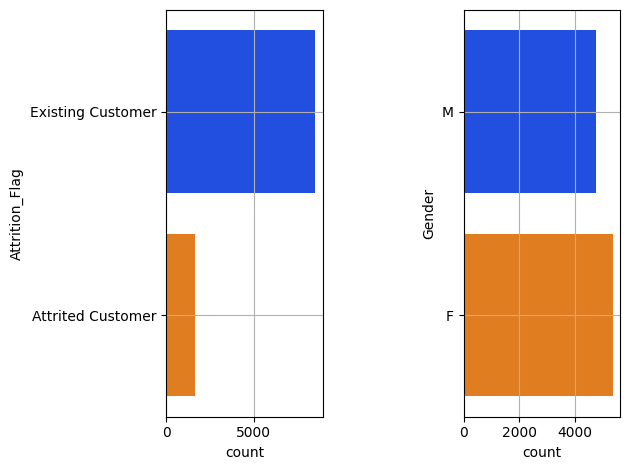

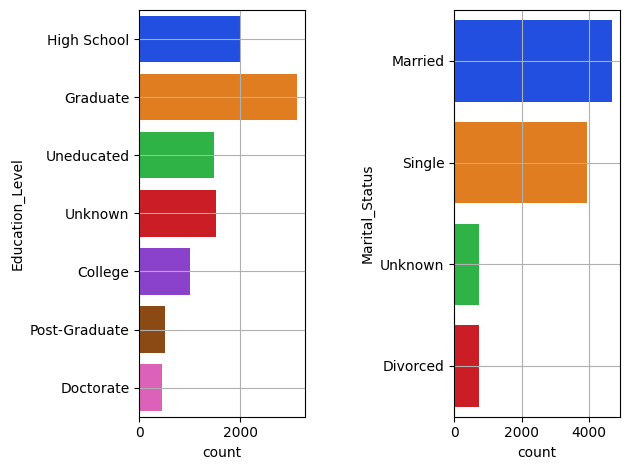

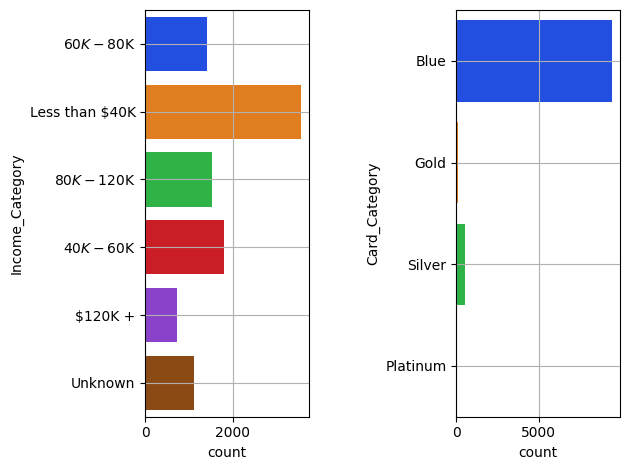

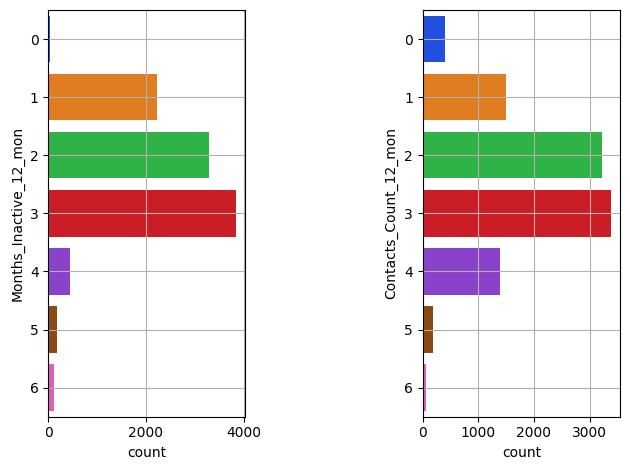

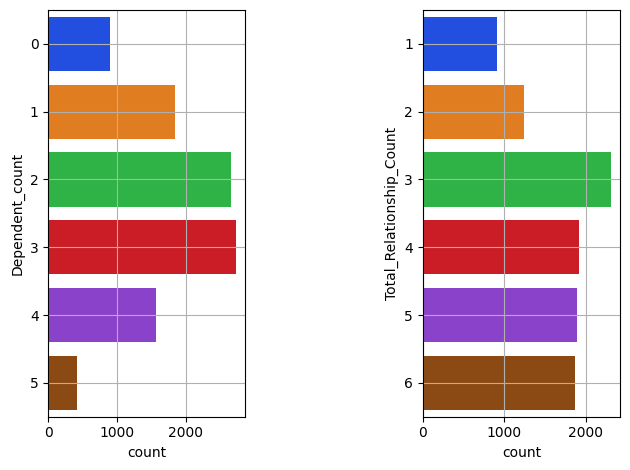

In [ ]:
cnt_plot_cat(col=2,cat_col_list=cat_col,df=bank)

In [ ]:
bank_stats=bank[num_col].describe()
IQR = bank_stats.loc["75%"]-bank_stats.loc["25%"]
Q1=bank_stats.loc["50%"]-1.5*IQR
Q3=bank_stats.loc["50%"]+1.5*IQR

In [ ]:
bank_stats

,CLIENTNUM,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,35.928409,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,7.986416,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,13.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,31.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,36.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,40.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,56.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
IQR

,0
CLIENTNUM,6.010676e+07
Customer_Age,1.100000e+01
Months_on_book,9.000000e+00
Credit_Limit,8.512500e+03
Total_Revolving_Bal,1.425000e+03
Avg_Open_To_Buy,8.534500e+03
Total_Amt_Chng_Q4_Q1,2.280000e-01
Total_Trans_Amt,2.585500e+03
Total_Trans_Ct,3.600000e+01
Total_Ct_Chng_Q4_Q1,2.360000e-01


In [ ]:
Q1

,0
CLIENTNUM,6.277662e+08
Customer_Age,2.950000e+01
Months_on_book,2.250000e+01
Credit_Limit,-8.219750e+03
Total_Revolving_Bal,-8.615000e+02
Avg_Open_To_Buy,-9.327750e+03
Total_Amt_Chng_Q4_Q1,3.940000e-01
Total_Trans_Amt,2.075000e+01
Total_Trans_Ct,1.300000e+01
Total_Ct_Chng_Q4_Q1,3.480000e-01


In [ ]:
Q3

,0
CLIENTNUM,8.080865e+08
Customer_Age,6.250000e+01
Months_on_book,4.950000e+01
Credit_Limit,1.731775e+04
Total_Revolving_Bal,3.413500e+03
Avg_Open_To_Buy,1.627575e+04
Total_Amt_Chng_Q4_Q1,1.078000e+00
Total_Trans_Amt,7.777250e+03
Total_Trans_Ct,1.210000e+02
Total_Ct_Chng_Q4_Q1,1.056000e+00


In [ ]:
out_treat = ((bank[num_col]<Q1) | (bank[num_col]>Q3)).sum()
out_treat

,0
CLIENTNUM,725
Customer_Age,414
Months_on_book,1085
Credit_Limit,1531
Total_Revolving_Bal,0
Avg_Open_To_Buy,1519
Total_Amt_Chng_Q4_Q1,765
Total_Trans_Amt,1183
Total_Trans_Ct,136
Total_Ct_Chng_Q4_Q1,936


In [ ]:
cat_col,num_col

(['Attrition_Flag',
  'Gender',
  'Education_Level',
  'Marital_Status',
  'Income_Category',
  'Card_Category',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon',
  'Dependent_count',
  'Total_Relationship_Count'],
 ['CLIENTNUM',
  'Customer_Age',
  'Months_on_book',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'])

In [ ]:
bank.groupby("Gender").agg({'Attrition_Flag':"count"})

,Attrition_Flag
Gender,
F,5358
M,4769


Total plots: 9
Max rows: 9, Max columns: 1


<Figure size 1000x1000 with 0 Axes>

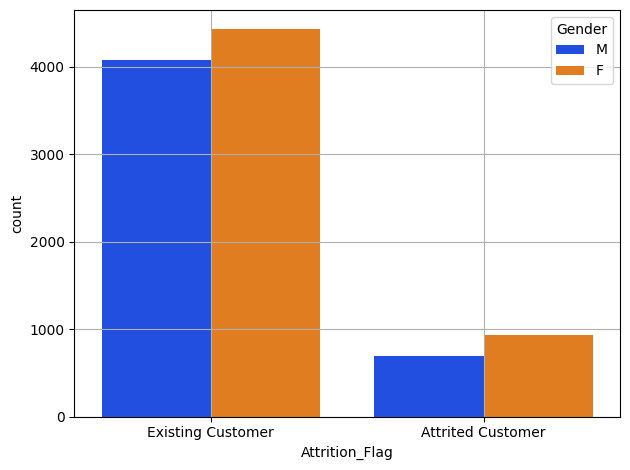

<Figure size 1000x1000 with 0 Axes>

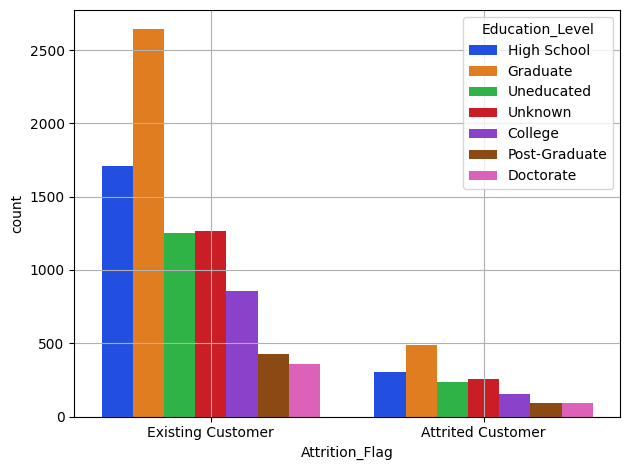

<Figure size 1000x1000 with 0 Axes>

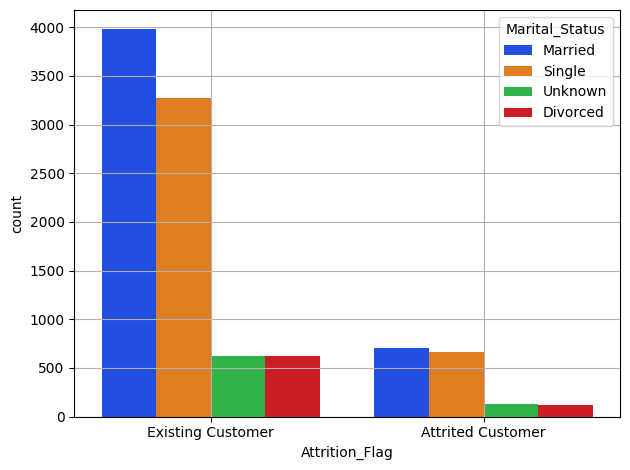

<Figure size 1000x1000 with 0 Axes>

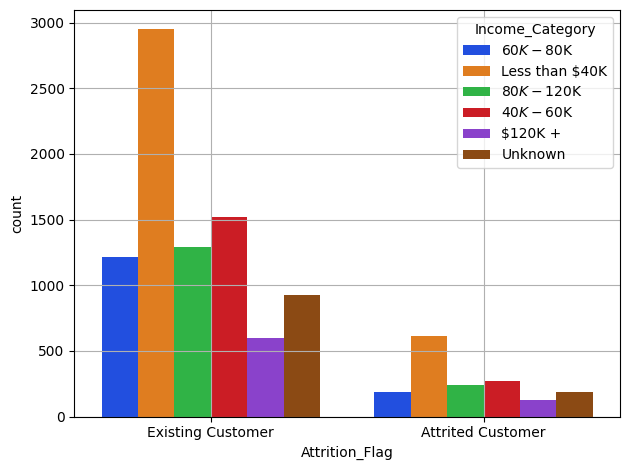

<Figure size 1000x1000 with 0 Axes>

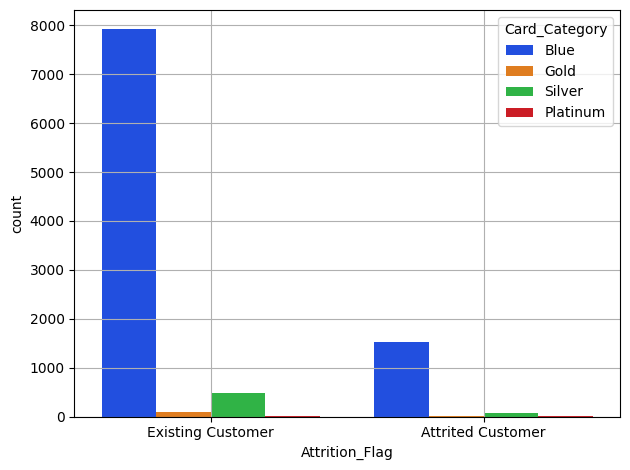

<Figure size 1000x1000 with 0 Axes>

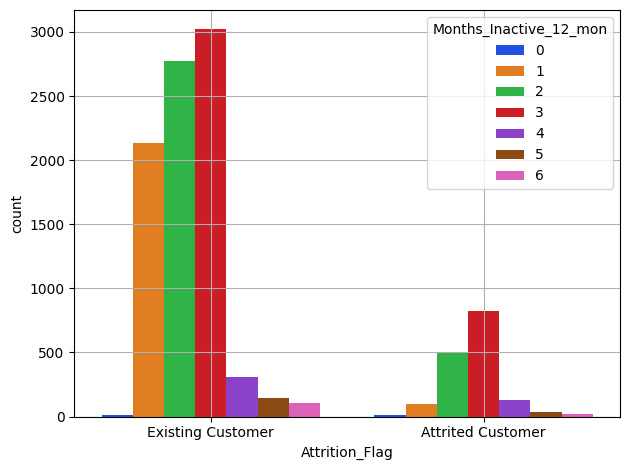

<Figure size 1000x1000 with 0 Axes>

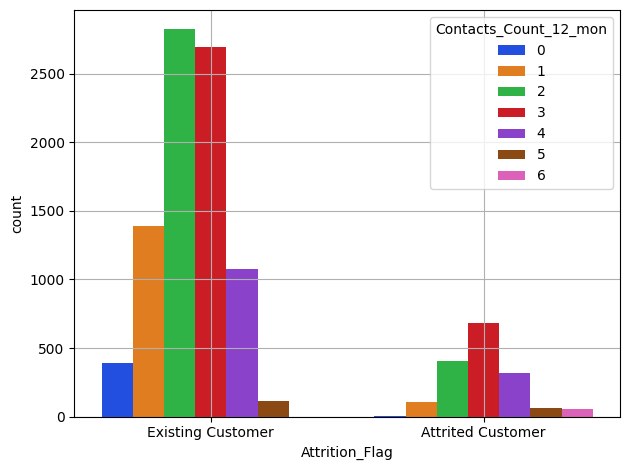

<Figure size 1000x1000 with 0 Axes>

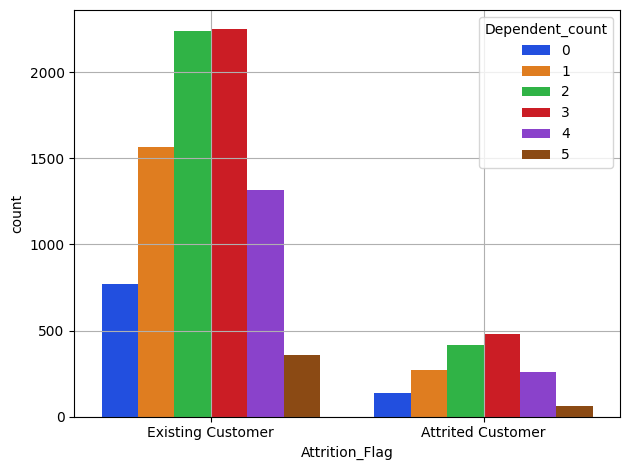

In [ ]:
total_plots=len(cat_col)-1
print(f"Total plots: {total_plots}")
col_div=1
max_rows=math.ceil(total_plots/col_div)
print(f"Max rows: {max_rows}, Max columns: {col_div}")
row=1
j=1
while row<max_rows:
  plt.figure(figsize=(10,10))
  plt.subplots(1,col_div)
  col_plot=cat_col[j:j+col_div]
  for i in range(len(col_plot)):
    plt.subplot(1,col_div,i+1)
    sns.countplot(data=bank,x='Attrition_Flag',hue=col_plot[i], palette='bright')
    plt.grid(visible= True , which=  'both', axis = "both")
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.xlabel("Attrition_Flag")
  j=j+col_div
  row=row+1
plt.show()

In [ ]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


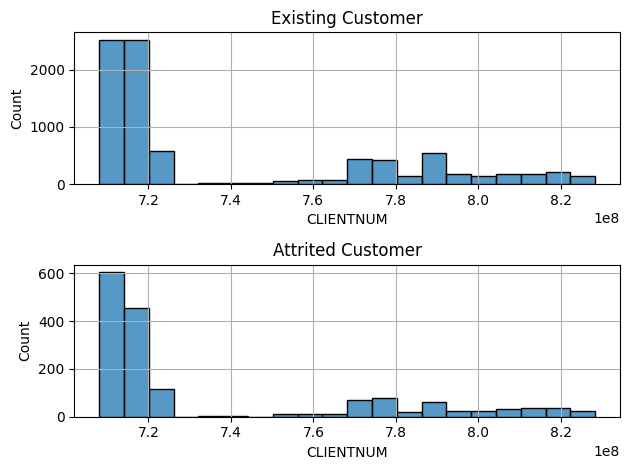

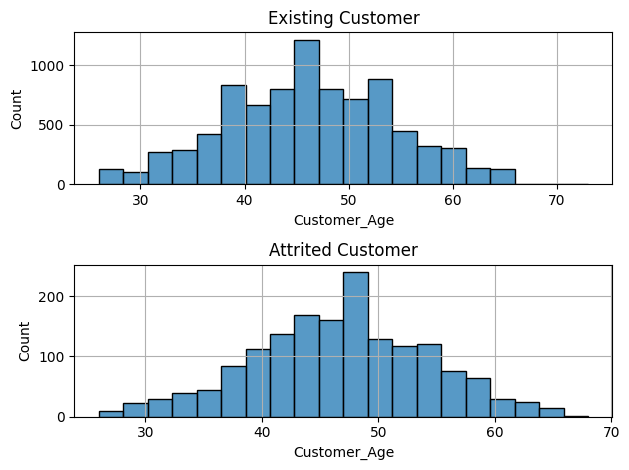

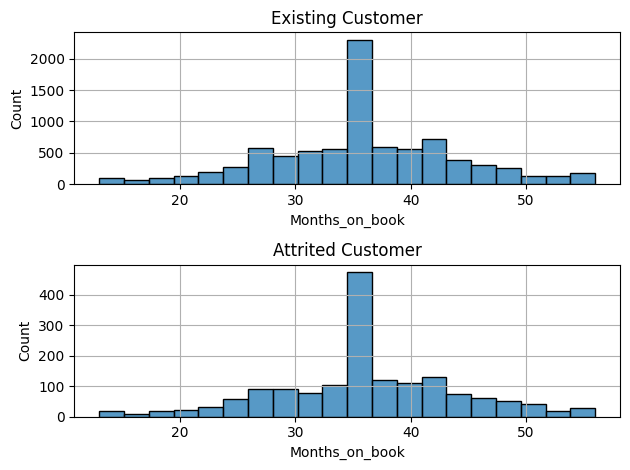

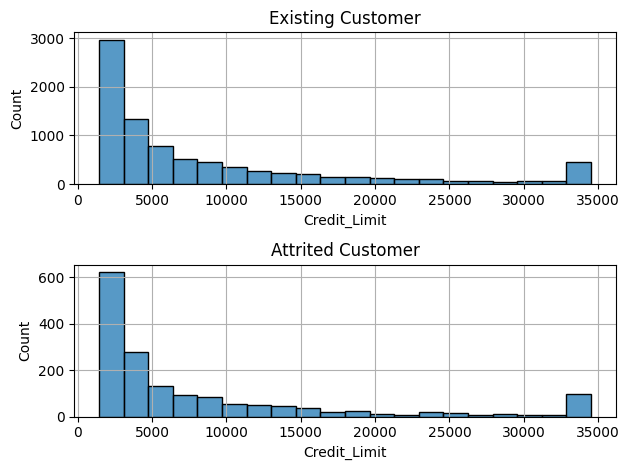

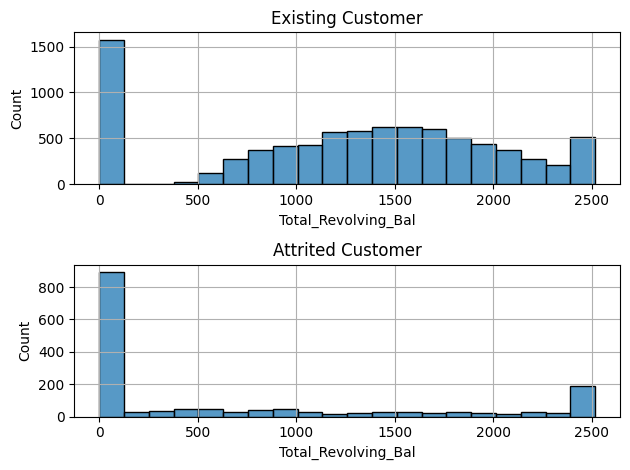

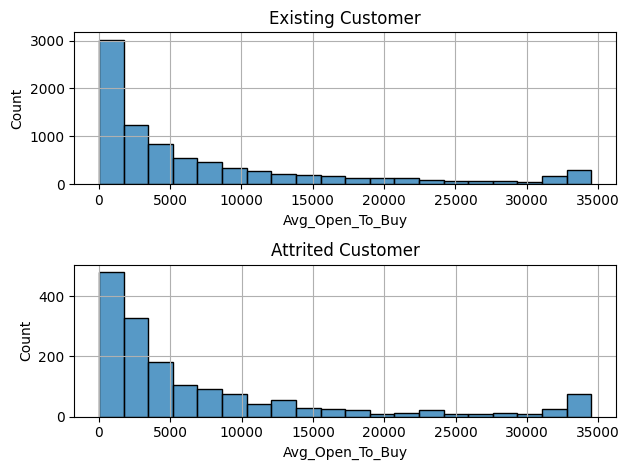

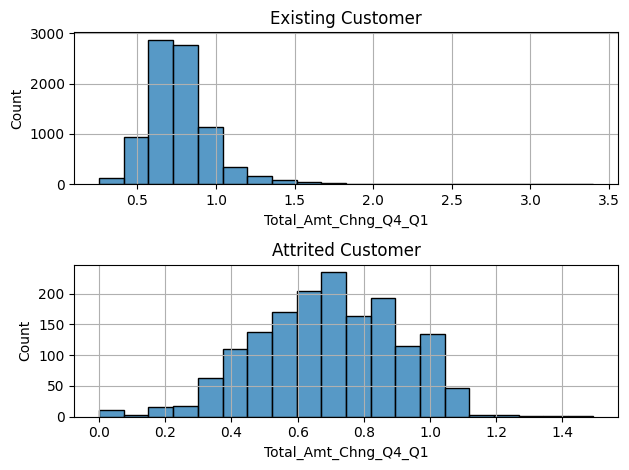

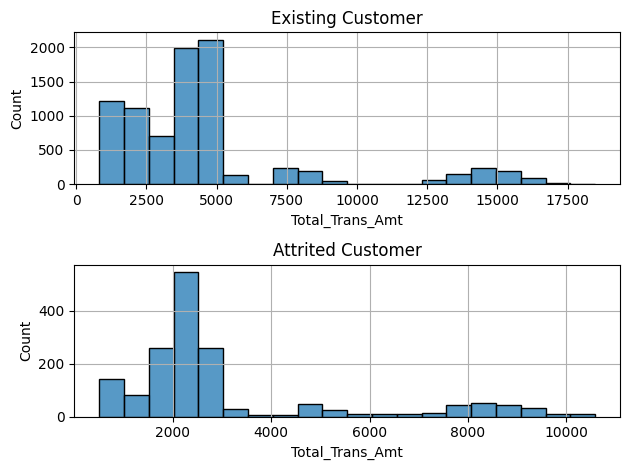

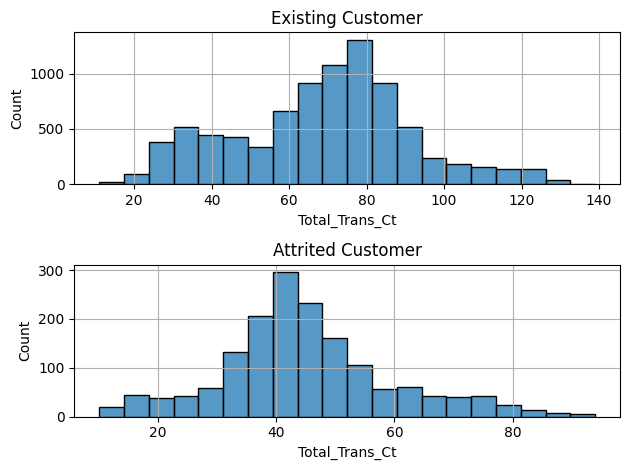

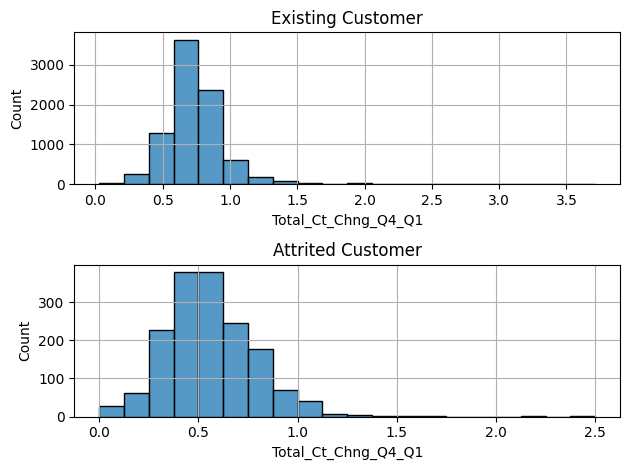

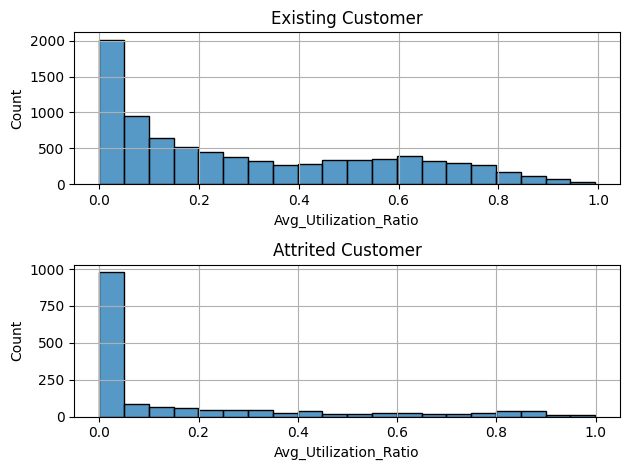

In [ ]:
for col in num_col:
  plt.subplots(2,1)
  plt.subplot(2,1,1)
  sns.histplot(data=bank[bank["Attrition_Flag"]=="Existing Customer"],x=col,palette="bright",bins=20)
  plt.title("Existing Customer")
  plt.tight_layout()
  plt.grid(visible= True , which=  'both', axis = "both")
  plt.subplot(2,1,2)
  sns.histplot(data=bank[bank["Attrition_Flag"]=="Attrited Customer"],x=col,palette="bright", bins=20)
  plt.title("Attrited Customer")
  plt.tight_layout()
  plt.tight_layout()
  plt.grid(visible= True , which=  'both', axis = "both")
plt.show()

In [ ]:
x=bank.drop(columns=["CLIENTNUM","Attrition_Flag"])
y=bank["Attrition_Flag"].map({"Existing Customer":0,"Attrited Customer":1})

<Axes: xlabel='Attrition_Flag'>

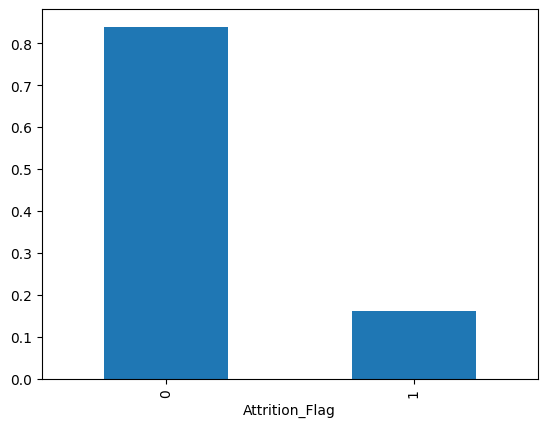

In [ ]:
y.value_counts(normalize=True).plot(kind="bar")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8101, 19), (2026, 19), (8101,), (2026,))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config

In [ ]:
set_config(transform_output='pandas')

In [ ]:
def min_max_scl(x):
    ret= (x.values - np.min(x)) / (np.max(x) - np.min(x))
    return ret
min_max_scl(bank["Customer_Age"])

array([0.40425532, 0.4893617 , 0.53191489, ..., 0.38297872, 0.08510638,
       0.36170213])

In [ ]:
age_pipe=Pipeline(steps=[
    ("Min Max Scaling",FunctionTransformer(min_max_scl, validate=False))
])
age_pipe.fit_transform(bank["Customer_Age"])

array([0.40425532, 0.4893617 , 0.53191489, ..., 0.38297872, 0.08510638,
       0.36170213])

In [ ]:
def lab_enc(x):
    ret= np.where(x == 'F', 0, 1)
    return ret
lab_enc(bank["Gender"])

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
gen_pipe=Pipeline(steps=[
    ("MAP Encoder",FunctionTransformer(lab_enc, validate=False))
])
gen_pipe.fit_transform(bank["Gender"])

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
def edu_encode(x):
    edu_map = {
         "Uneducated": 0, "High School": 1, "College": 3,
         "Graduate": 4, "Post-Graduate": 5, "Doctorate": 6, "Unknown": 2}
    ret= np.vectorize(edu_map.get)(x)
    return ret
edu_encode(bank["Education_Level"])

array([1, 4, 4, ..., 1, 4, 4])

In [ ]:
edu_pipe=Pipeline(steps=[
    ("EDu Encoder",FunctionTransformer(edu_encode, validate=False))
])
edu_pipe.fit_transform(bank["Education_Level"])

array([1, 4, 4, ..., 1, 4, 4])

In [ ]:
def martial_encode(x):
  mar_map = {"Married":1,"Single":0,"Divorced":2,"Unknown":3}
  ret= np.vectorize(mar_map.get)(x)
  return ret
martial_encode(bank["Marital_Status"])

array([1, 0, 1, ..., 1, 3, 1])

In [ ]:
marr_pipe=Pipeline(steps=[
    ("Marital Encoder",FunctionTransformer(martial_encode, validate=False))
])
marr_pipe.fit_transform(bank["Marital_Status"])

array([1, 0, 1, ..., 1, 3, 1])

In [ ]:
bank["Income_Category"].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
def income_encode(x):
    inc_map={"Less than $40K":0,"$40K - $60K":1,"$60K - $80K":2,"$80K - $120K":3,"$120K +":4,"Unknown":5}
    ret= np.vectorize(inc_map.get)(x)
    return ret
income_encode(bank["Income_Category"])


array([2, 0, 3, ..., 0, 1, 0])

In [ ]:
income_pipe=Pipeline(steps=[
    ("Income Encoder",FunctionTransformer(income_encode, validate=False))
])
income_pipe.fit_transform(bank["Income_Category"])

array([2, 0, 3, ..., 0, 1, 0])

<Axes: xlabel='Card_Category'>

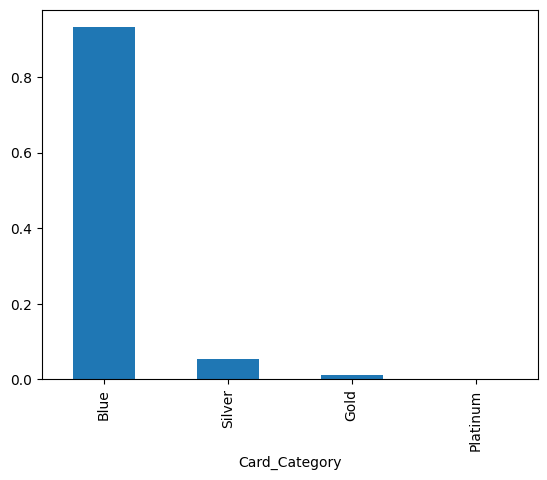

In [ ]:
bank['Card_Category'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
def card_encode(x):
    card_map={"Blue":0,"Silver":1,"Gold":2,"Platinum":3}
    ret= np.vectorize(card_map.get)(x)
    return ret
card_encode(bank["Card_Category"])

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
card_pipe=Pipeline(steps=[
    ("Card Encoder",FunctionTransformer(card_encode, validate=False))
])
card_pipe.fit_transform(bank["Card_Category"])

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ("Age",age_pipe,["Customer_Age"]),
    ("Gender",gen_pipe,["Gender"]),
    ("Education",edu_pipe,["Education_Level"]),
    ("Marital",marr_pipe,["Marital_Status"]),
    ("Income",income_pipe,["Income_Category"]),
    ("Card",card_pipe,["Card_Category"]),
    ("Months_on_book",FunctionTransformer(min_max_scl, validate=False),["Months_on_book"]),
    ("Credit_Limit",FunctionTransformer(min_max_scl, validate=False),["Credit_Limit"]),
    ("Total_Revolving_Bal",FunctionTransformer(min_max_scl, validate=False),["Total_Revolving_Bal"]),
    ("Avg_Open_To_Buy",FunctionTransformer(min_max_scl, validate=False),["Avg_Open_To_Buy"]),
    ("Total_Amt_Chng_Q4_Q1",FunctionTransformer(min_max_scl, validate=False),["Total_Amt_Chng_Q4_Q1"]),
    ("Total_Trans_Amt",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Amt"]),
    ("Total_Trans_Ct",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Ct"])

], remainder="passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Age',
                                 Pipeline(steps=[('Min Max Scaling',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                 ['Customer_Age']),
                                ('Gender',
                                 Pipeline(steps=[('MAP Encoder',
                                                  FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                 ['Gender']),
                                ('Education',
                                 Pipeline(steps=[('EDu Encoder',
                                                  FunctionTra...
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Avg_Open_To_Buy']),
                                ('Total_Amt_Chng_Q4_Q1',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Amt_Chng_Q4_Q1']),
                                ('Total_Trans_Amt',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Amt']),
                                ('Total_Trans_Ct',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Ct'])])

In [ ]:
preprocessor.get_params()

{'force_int_remainder_cols': True,
 'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('Age',
   Pipeline(steps=[('Min Max Scaling',
                    FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
   ['Customer_Age']),
  ('Gender',
   Pipeline(steps=[('MAP Encoder',
                    FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
   ['Gender']),
  ('Education',
   Pipeline(steps=[('EDu Encoder',
                    FunctionTransformer(func=<function edu_encode at 0x79d08088c0d0>))]),
   ['Education_Level']),
  ('Marital',
   Pipeline(steps=[('Marital Encoder',
                    FunctionTransformer(func=<function martial_encode at 0x79d08088c820>))]),
   ['Marital_Status']),
  ('Income',
   Pipeline(steps=[('Income Encoder',
                    FunctionTransformer(func=<function income_encode at 0x79d08088c4c0>))]),
   ['Income_Category']),
  ('Card',
   Pipeline(steps

In [ ]:
x_scaled=preprocessor.fit_transform(x)
x_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.404255,1.0,1.0,1.0,2.0,0.0,0.604651,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,3.0,5.0,1.0,3.0,1.625,0.061
1,0.489362,0.0,4.0,0.0,0.0,0.0,0.720930,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,5.0,6.0,1.0,2.0,3.714,0.105
2,0.531915,1.0,4.0,1.0,3.0,0.0,0.534884,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,3.0,4.0,1.0,0.0,2.333,0.000
3,0.297872,0.0,1.0,3.0,0.0,0.0,0.488372,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,4.0,3.0,4.0,1.0,2.333,0.760
4,0.297872,1.0,0.0,1.0,2.0,0.0,0.186047,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,3.0,5.0,1.0,0.0,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,1.0,4.0,0.0,1.0,0.0,0.627907,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,2.0,3.0,2.0,3.0,0.857,0.462
10123,0.319149,1.0,2.0,2.0,1.0,0.0,0.279070,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,2.0,4.0,2.0,3.0,0.683,0.511
10124,0.382979,0.0,1.0,1.0,0.0,0.0,0.534884,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,1.0,5.0,3.0,4.0,0.818,0.000
10125,0.085106,1.0,4.0,3.0,1.0,0.0,0.534884,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,2.0,4.0,3.0,3.0,0.722,0.000


In [ ]:
type(x_scaled)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_model=RandomForestClassifier(random_state=42)

In [ ]:
param_dist = {
    'n_estimators': list(range(10, 200)),
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 20)),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ["gini",'entropy']
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [ ]:
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",random_search)
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
                                                                               11,
                                                                               12,
                  

In [ ]:
model_pipeline.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                                       14, 15,
                                                                       16, 17,
                                                                       18, 19],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19],
                                                         'min_samples_split': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6,
                                                                               7,
                                                                               8,
                                                                               9,
                                                                               10,
                                                                               11,
                                                                               12,
                  

In [ ]:
random_search.best_params_

{'n_estimators': 71,
 'min_samples_split': 17,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 17,
 'criterion': 'entropy'}

In [ ]:
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(**random_search.best_params_))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print("Accuracy Report for Best Hyper Parameter Tuning\n")
print(f"Training Score: {model_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {model_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,model_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,model_pipeline.predict(x_test))}")

Accuracy Report for Best Hyper Parameter Tuning

Training Score: 0.9817306505369707

Testing Score: 0.9491609081934848

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6799
           1       0.96      0.93      0.94      1302

    accuracy                           0.98      8101
   macro avg       0.97      0.96      0.97      8101
weighted avg       0.98      0.98      0.98      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.92      0.74      0.82       325

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [ ]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline    # For imblean use imblearn pipeline

In [ ]:
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("model",RandomForestClassifier(**random_search.best_params_))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
print("Accuracy Report for Over Sampling\n")
print(f"Training Score: {model_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {model_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,model_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,model_pipeline.predict(x_test))}")

Accuracy Report for Over Sampling

Training Score: 0.9829650660412295

Testing Score: 0.9427443237907206

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6799
           1       0.92      0.98      0.95      1302

    accuracy                           0.98      8101
   macro avg       0.96      0.98      0.97      8101
weighted avg       0.98      0.98      0.98      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1701
           1       0.81      0.83      0.82       325

    accuracy                           0.94      2026
   macro avg       0.89      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=19)
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("pca",pca),
    ("model",RandomForestClassifier(**random_search.best_params_))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=19)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=19)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
print("Accuracy Report for PCA Analysis\n")
print(f"Training Score: {model_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {model_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,model_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,model_pipeline.predict(x_test))}")

Accuracy Report for PCA Analysis

Training Score: 0.981483767436119

Testing Score: 0.9017769002961501

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6799
           1       0.91      0.98      0.94      1302

    accuracy                           0.98      8101
   macro avg       0.95      0.98      0.97      8101
weighted avg       0.98      0.98      0.98      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1701
           1       0.67      0.75      0.71       325

    accuracy                           0.90      2026
   macro avg       0.81      0.84      0.83      2026
weighted avg       0.91      0.90      0.90      2026



In [ ]:
pca_score=np.array(pca.explained_variance_ratio_)
print(f"PCA CUMULATIVE SCORE: {pca_score.cumsum()}")
pca_col=(pca_score.cumsum()<=0.99).sum()
pca_col

PCA CUMULATIVE SCORE: [0.23627311 0.44690428 0.62810722 0.74392266 0.83192273 0.89548492
 0.94626479 0.9633926  0.97483816 0.98446148 0.9888173  0.9922287
 0.99529716 0.99790661 0.99900391 0.99942235 0.99978253 1.
 1.        ]


11

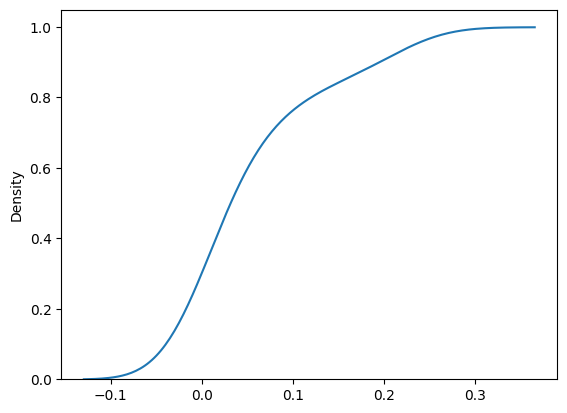

In [ ]:
sns.kdeplot(pca.explained_variance_ratio_, cumulative=True)
plt.show()

In [ ]:
pca = PCA(n_components=11)
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("pca",pca),
    ("model",RandomForestClassifier(**random_search.best_params_))
])
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=11)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
print("Accuracy Report for PCA Analysis\n")
print(f"Training Score: {model_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {model_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,model_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,model_pipeline.predict(x_test))}")

Accuracy Report for PCA Analysis

Training Score: 0.9691396123935316

Testing Score: 0.8741362290227048

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6799
           1       0.87      0.96      0.91      1302

    accuracy                           0.97      8101
   macro avg       0.93      0.96      0.95      8101
weighted avg       0.97      0.97      0.97      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1701
           1       0.59      0.68      0.64       325

    accuracy                           0.87      2026
   macro avg       0.77      0.80      0.78      2026
weighted avg       0.88      0.87      0.88      2026



In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe= RFE(estimator=RandomForestClassifier(**random_search.best_params_), n_features_to_select=11, step=1)

In [ ]:
model_pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("rfe",rfe)
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(criterion='entropy',
                                                      max_depth=17,
                                                      max_features=None,
                                                      min_samples_leaf=3,
                                                      min_samples_split=17,
                                                      n_estimators=71),
                     n_features_to_select=11))])

In [ ]:
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('rfe',
                 RFE(estimator=RandomForestClassifier(criterion='entropy',
                                                      max_depth=17,
                                                      max_features=None,
                                                      min_samples_leaf=3,
                                                      min_samples_split=17,
                                                      n_estimators=71),
                     n_features_to_select=11))])

In [ ]:
print("Accuracy Report for Best Feature Selection\n")
print(f"Training Score: {model_pipeline.score(x_train,y_train)}\n")
print(f"Testing Score: {model_pipeline.score(x_test,y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(y_train,model_pipeline.predict(x_train))}")
print(f"Testing Classfication Report:\n {classification_report(y_test,model_pipeline.predict(x_test))}")

Accuracy Report for Best Feature Selection

Training Score: 0.9808665596839896

Testing Score: 0.9397828232971372

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6799
           1       0.91      0.98      0.94      1302

    accuracy                           0.98      8101
   macro avg       0.95      0.98      0.97      8101
weighted avg       0.98      0.98      0.98      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1701
           1       0.81      0.82      0.81       325

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [ ]:
rfe.ranking_, len(rfe.ranking_)

(array([1, 5, 7, 3, 8, 9, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 6]), 19)

In [ ]:
rfe.support_

array([ True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False])

In [ ]:
final_columns=np.array(x_train.columns)[rfe.support_]
final_columns

array(['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'], dtype=object)

In [ ]:
final_preprocessor=ColumnTransformer(transformers=[
    ("Age",age_pipe,["Customer_Age"]),
    ("Months_on_book",FunctionTransformer(min_max_scl, validate=False),["Months_on_book"]),
    ("Credit_Limit",FunctionTransformer(min_max_scl, validate=False),["Credit_Limit"]),
    ("Total_Revolving_Bal",FunctionTransformer(min_max_scl, validate=False),["Total_Revolving_Bal"]),
    ("Total_Amt_Chng_Q4_Q1",FunctionTransformer(min_max_scl, validate=False),["Total_Amt_Chng_Q4_Q1"]),
    ("Total_Trans_Amt",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Amt"]),
    ("Total_Trans_Ct",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Ct"])
], remainder="passthrough")
final_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Age',
                                 Pipeline(steps=[('Min Max Scaling',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                 ['Customer_Age']),
                                ('Months_on_book',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Months_on_book']),
                                ('Credit_Limit',
                                 FunctionTransformer(func=<function min_max_scl at 0x79...
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Revolving_Bal']),
                                ('Total_Amt_Chng_Q4_Q1',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Amt_Chng_Q4_Q1']),
                                ('Total_Trans_Amt',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Amt']),
                                ('Total_Trans_Ct',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Ct'])])

In [ ]:
final_model_pipeline=Pipeline(steps=[
    ("preprocessor",final_preprocessor),
    ("smote",SMOTE(random_state=42)),
    ("model",RandomForestClassifier(**random_search.best_params_))
])
final_model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Months_on_book',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Months_on_book']),
                                                 ('Credit_Limit',
                                                  FunctionTransform...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
final_x=x[final_columns]
final_x

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,45,39,5,1,3,12691.0,777,1.335,1144,42,1.625
1,49,44,6,1,2,8256.0,864,1.541,1291,33,3.714
2,51,36,4,1,0,3418.0,0,2.594,1887,20,2.333
3,40,34,3,4,1,3313.0,2517,1.405,1171,20,2.333
4,40,21,5,1,0,4716.0,0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...
10122,50,40,3,2,3,4003.0,1851,0.703,15476,117,0.857
10123,41,25,4,2,3,4277.0,2186,0.804,8764,69,0.683
10124,44,36,5,3,4,5409.0,0,0.819,10291,60,0.818
10125,30,36,4,3,3,5281.0,0,0.535,8395,62,0.722


In [ ]:
final_x_train,final_x_test,final_y_train,final_y_test=train_test_split(final_x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
final_model_pipeline.fit(final_x_train,final_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Months_on_book',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Months_on_book']),
                                                 ('Credit_Limit',
                                                  FunctionTransform...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=17,
                                        max_features=None, min_samples_leaf=3,
                                        min_samples_split=17,
                                        n_estimators=71))])

In [ ]:
print("Accuracy Report for Final Model Selection\n")
print(f"Training Score: {final_model_pipeline.score(final_x_train,final_y_train)}\n")
print(f"Testing Score: {final_model_pipeline.score(final_x_test,final_y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(final_y_train,final_model_pipeline.predict(final_x_train))}")
print(f"Testing Classfication Report:\n {classification_report(final_y_test,final_model_pipeline.predict(final_x_test))}")

Accuracy Report for Final Model Selection

Training Score: 0.9823478582891001

Testing Score: 0.941263573543929

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6799
           1       0.91      0.98      0.95      1302

    accuracy                           0.98      8101
   macro avg       0.96      0.98      0.97      8101
weighted avg       0.98      0.98      0.98      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1701
           1       0.81      0.83      0.82       325

    accuracy                           0.94      2026
   macro avg       0.89      0.90      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [ ]:
import joblib

In [ ]:
joblib.dump(final_model_pipeline,"RF_model.pkl")

['/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/Banking Domain/RF_model.pkl']

In [ ]:
rf_pipeline=joblib.load("RF_model.pkl")

In [ ]:
final_x_test.iloc[[0]]

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
2919,65,56,4,2,2,3226.0,2073,1.035,3250,70,0.591


In [ ]:
rf_pipeline.predict(final_x_test.iloc[[0]])

array([1])

**CARD CATEGORY PREDICTION**

In [ ]:
cluster_y=x["Card_Category"].map({"Blue":0,"Silver":1,"Gold":2,"Platinum":3})
cluster_x=x.loc[:,[i for i in x.columns if i!="Card_Category"]]
cluster_x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,F,1,High School,Married,Less than $40K,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
cluster_x_train,cluster_x_test,cluster_y_train,cluster_y_test=train_test_split(cluster_x,cluster_y,test_size=0.2,random_state=42,stratify=cluster_y)
cluster_x_train.shape,cluster_x_test.shape,cluster_y_train.shape,cluster_y_test.shape

((8101, 18), (2026, 18), (8101,), (2026,))

In [ ]:
cluster_preprocessor=ColumnTransformer(transformers=[
    ("Age",age_pipe,["Customer_Age"]),
    ("Gender",gen_pipe,["Gender"]),
    ("Education",edu_pipe,["Education_Level"]),
    ("Marital",marr_pipe,["Marital_Status"]),
    ("Income",income_pipe,["Income_Category"]),
    ("Months_on_book",FunctionTransformer(min_max_scl, validate=False),["Months_on_book"]),
    ("Credit_Limit",FunctionTransformer(min_max_scl, validate=False),["Credit_Limit"]),
    ("Total_Revolving_Bal",FunctionTransformer(min_max_scl, validate=False),["Total_Revolving_Bal"]),
    ("Avg_Open_To_Buy",FunctionTransformer(min_max_scl, validate=False),["Avg_Open_To_Buy"]),
    ("Total_Amt_Chng_Q4_Q1",FunctionTransformer(min_max_scl, validate=False),["Total_Amt_Chng_Q4_Q1"]),
    ("Total_Trans_Amt",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Amt"]),
    ("Total_Trans_Ct",FunctionTransformer(min_max_scl, validate=False),["Total_Trans_Ct"])

], remainder="passthrough")
cluster_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Age',
                                 Pipeline(steps=[('Min Max Scaling',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                 ['Customer_Age']),
                                ('Gender',
                                 Pipeline(steps=[('MAP Encoder',
                                                  FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                 ['Gender']),
                                ('Education',
                                 Pipeline(steps=[('EDu Encoder',
                                                  FunctionTra...
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Avg_Open_To_Buy']),
                                ('Total_Amt_Chng_Q4_Q1',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Amt_Chng_Q4_Q1']),
                                ('Total_Trans_Amt',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Amt']),
                                ('Total_Trans_Ct',
                                 FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                 ['Total_Trans_Ct'])])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_pipeline=Pipeline(steps=[("preprocessor",cluster_preprocessor),("smote",SMOTE()),("model",knn)])
knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Amt_Chng_Q4_Q1']),
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE()),
                ('model', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
knn_pipeline.fit(cluster_x_train,cluster_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Amt_Chng_Q4_Q1']),
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE()),
                ('model', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
print("Accuracy Report for Cluster Model with K Nearest Neghbour Selection\n")
print(f"Training Score: {knn_pipeline.score(cluster_x_train,cluster_y_train)}\n")
print(f"Testing Score: {knn_pipeline.score(cluster_x_test,cluster_y_test)}\n")
print(f"Training Classfication Report:\n {classification_report(cluster_y_train,knn_pipeline.predict(cluster_x_train))}")
print(f"Testing Classfication Report:\n {classification_report(cluster_y_test,knn_pipeline.predict(cluster_x_test))}")

Accuracy Report for Cluster Model with K Nearest Neghbour Selection

Training Score: 0.9307492902110851

Testing Score: 0.8178677196446199

Training Classfication Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      7548
           1       0.54      1.00      0.70       444
           2       0.40      1.00      0.57        93
           3       0.30      1.00      0.46        16

    accuracy                           0.93      8101
   macro avg       0.56      0.98      0.67      8101
weighted avg       0.97      0.93      0.94      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1888
           1       0.18      0.40      0.25       111
           2       0.02      0.09      0.04        23
           3       0.00      0.00      0.00         4

    accuracy                           0.82      2026
   macro avg       0.29      0.33   

In [ ]:
kmean=KMeans(n_clusters=4)

In [ ]:
kmean_pipeline=Pipeline(steps=[("preprocessor",cluster_preprocessor),("smote",SMOTE()),("model",kmean)])
kmean_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                 ('Total_Amt_Chng_Q4_Q1',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Amt_Chng_Q4_Q1']),
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE()), ('model', KMeans(n_clusters=4))])

In [ ]:
kmean_pipeline.fit(cluster_x_train,cluster_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Age',
                                                  Pipeline(steps=[('Min Max '
                                                                   'Scaling',
                                                                   FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>))]),
                                                  ['Customer_Age']),
                                                 ('Gender',
                                                  Pipeline(steps=[('MAP '
                                                                   'Encoder',
                                                                   FunctionTransformer(func=<function lab_enc at 0x79d080873400>))]),
                                                  ['Gender']),
                                                 ('Education',
                                                  Pipel...
                                                 ('Total_Amt_Chng_Q4_Q1',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Amt_Chng_Q4_Q1']),
                                                 ('Total_Trans_Amt',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Amt']),
                                                 ('Total_Trans_Ct',
                                                  FunctionTransformer(func=<function min_max_scl at 0x79d0808732e0>),
                                                  ['Total_Trans_Ct'])])),
                ('smote', SMOTE()), ('model', KMeans(n_clusters=4))])

In [ ]:
cluster_y_train.value_counts()

,count
Card_Category,
0,7548
1,444
2,93
3,16


In [ ]:
pd.DataFrame(kmean_pipeline.predict(cluster_x_train)).value_counts()

,count
0,
1,3190
2,2035
3,1733
0,1143


In [ ]:
print("Accuracy Report for Cluster Model with K Means Selection\n")
print(f"Training Score: {accuracy_score(cluster_y_train,kmean_pipeline.predict(cluster_x_train))}\n")
print(f"Testing Score: {accuracy_score(cluster_y_test,kmean_pipeline.predict(cluster_x_test))}\n")
print(f"Training Classfication Report:\n {classification_report(cluster_y_train,kmean_pipeline.predict(cluster_x_train))}")
print(f"Testing Classfication Report:\n {classification_report(cluster_y_test,kmean_pipeline.predict(cluster_x_test))}")

Accuracy Report for Cluster Model with K Means Selection

Training Score: 0.1454141464016788

Testing Score: 0.1416584402764067

Training Classfication Report:
               precision    recall  f1-score   support

           0       0.90      0.14      0.24      7548
           1       0.04      0.28      0.07       444
           2       0.01      0.29      0.03        93
           3       0.00      0.25      0.00        16

    accuracy                           0.15      8101
   macro avg       0.24      0.24      0.08      8101
weighted avg       0.84      0.15      0.22      8101

Testing Classfication Report:
               precision    recall  f1-score   support

           0       0.91      0.13      0.22      1888
           1       0.04      0.33      0.08       111
           2       0.02      0.43      0.04        23
           3       0.00      0.00      0.00         4

    accuracy                           0.14      2026
   macro avg       0.24      0.22      0.08    